# Experiment records
- Trained model name: resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5 (Fine-tuned on base model)
- Trained for: 22 epochs
- Augmentations used: No
- Accuracy achieved: approx. 94%
- Dataset used: https://www.kaggle.com/datasets/jcprogjava/handwritten-digits-dataset-not-in-mnist
- Description: To check the above model performance on the given dataset


In [1]:
import tensorflow as tf
import sys  
import os
sys.path.append(os.path.realpath('../../src'))
# from predict import pred_using_h5_digit, pred_using_tflite_model
import cv2
import os
import glob
import numpy as np
import matplotlib.pyplot as plt

2022-12-23 17:54:47.498725: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-23 17:54:47.498758: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
# To insert background in the image
def get_mask(image):
    image = cv2.imread(image, cv2.IMREAD_UNCHANGED)    
    #make mask of where the transparent bits are
    trans_mask = image[:,:,3] == 0
    #replace areas of transparency with white and not transparent
    image[trans_mask] = [255, 255, 255, 255]
    #new image without alpha channel...
    new_img = cv2.cvtColor(image, cv2.COLOR_BGRA2BGR)
    return new_img

In [3]:
model = tf.keras.models.load_model('../../models/pre-trained_model/resnet_trained_model_digit_with_printed_v1_new_finetune_13_08_22_epoch_5.h5')

2022-12-23 17:54:52.071367: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-12-23 17:54:52.071390: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ti-lap-492): /proc/driver/nvidia/version does not exist
2022-12-23 17:54:52.071667: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
def pred_using_h5_digit(model, path, gt = None, prediction= None, wrong_imgs=None):
    result = {}
    gt=[]
    prediction = []
    wrong_imgs = {}
    wrong_count=0
    for img1 in sorted(glob.iglob(path)):
        img= get_mask(img1)
        img=cv2.resize(img,(28,28))
        img= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        img = img.astype('float32') / 255.
        img= np.reshape(img,(1,28,28,1))
        res=model.predict(img)
        pred=res[0].argmax(axis=0)
        ground_truth = int(img1.split('/')[-2])
        gt.append(int(ground_truth))
        prediction.append(pred)
        result[img1] = pred
        if pred!= int(ground_truth):
            wrong_count+=1
            wrong_imgs[img1] = pred
    accuracy = (len(glob.glob(path))-wrong_count)/len(glob.glob(path))
    return result, accuracy, gt, prediction, wrong_imgs

In [5]:
# For 0

In [6]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/0/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

2022-12-23 17:55:05.049693: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [7]:
print(len(wrong_imgs))

3


Text(0.5, 0.98, 'Misclassifications')

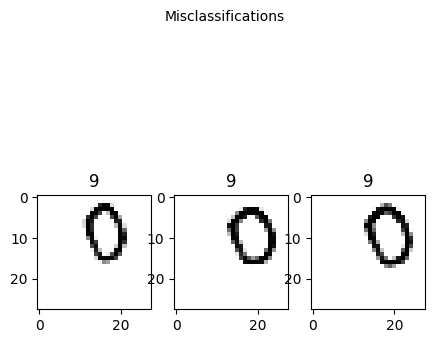

In [50]:
fig, axis = plt.subplots(nrows= 1, ncols=len(wrong_imgs), figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in wrong_imgs.items():
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)

In [24]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.9936974789915967
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       476
           9       0.00      0.00      0.00         0

    accuracy                           0.99       476
   macro avg       0.50      0.50      0.50       476
weighted avg       1.00      0.99      1.00       476



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# For 1

In [25]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/1/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [26]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           1       1.00      1.00      1.00       510

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [ ]:
# For 2

In [51]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/2/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [53]:
len(wrong_imgs)


TypeError: unhashable type: 'slice'

Text(0.5, 0.98, 'Misclassifications')

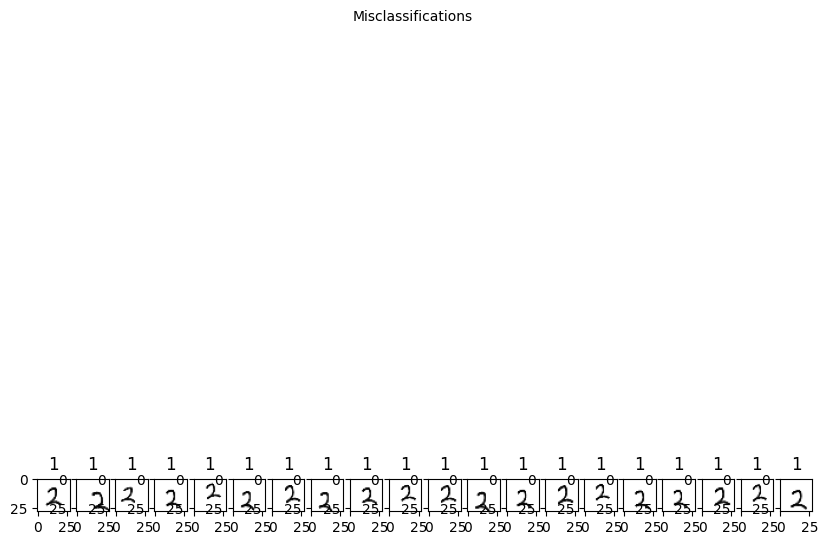

In [66]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=20, figsize=(10,10))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_imgs.items(), key=operator.itemgetter(1))[:20]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)

In [28]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.8058823529411765
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           2       1.00      0.81      0.89       510
           7       0.00      0.00      0.00         0

    accuracy                           0.81       510
   macro avg       0.33      0.27      0.30       510
weighted avg       1.00      0.81      0.89       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# For 3

In [67]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/3/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [68]:
len(wrong_imgs)

55

Text(0.5, 0.98, 'Misclassifications')

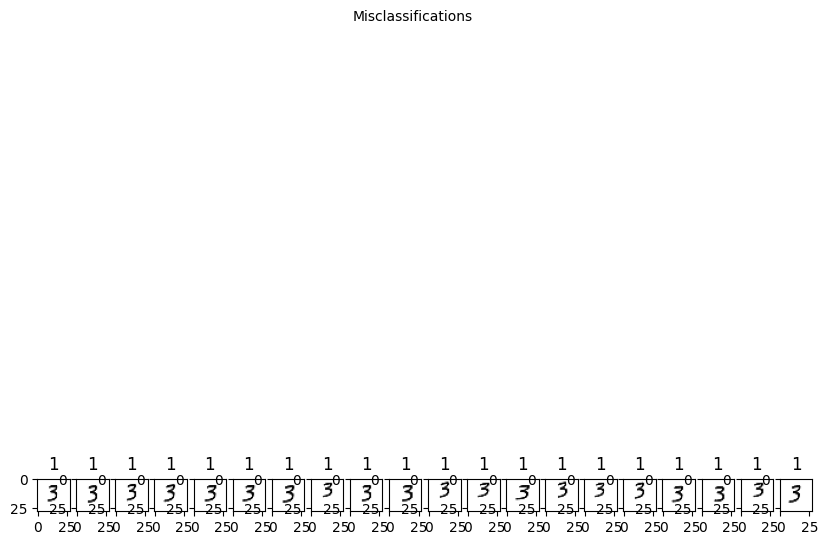

In [69]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=20, figsize=(10,10))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_imgs.items(), key=operator.itemgetter(1))[:20]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)

In [30]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.8921568627450981
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       1.00      0.89      0.94       510
           9       0.00      0.00      0.00         0

    accuracy                           0.89       510
   macro avg       0.33      0.30      0.31       510
weighted avg       1.00      0.89      0.94       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# For 4

In [31]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/4/*'
result, accuracy, gt, prediction = pred_using_h5_digit(model,path)

In [32]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           4       1.00      1.00      1.00       510

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [ ]:
# For 5

In [33]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/5/*'
result, accuracy, gt, prediction = pred_using_h5_digit(model,path)

In [34]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           5       1.00      1.00      1.00       510

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [ ]:
# For 6

In [35]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/6/*'
result, accuracy, gt, prediction = pred_using_h5_digit(model,path)

In [36]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           6       1.00      1.00      1.00       510

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [ ]:
# For 7

In [70]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/7/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [71]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.996078431372549
              precision    recall  f1-score   support

           1       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           7       1.00      1.00      1.00       510

    accuracy                           1.00       510
   macro avg       0.33      0.33      0.33       510
weighted avg       1.00      1.00      1.00       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
len(wrong_imgs)

2

Text(0.5, 0.98, 'Misclassifications')

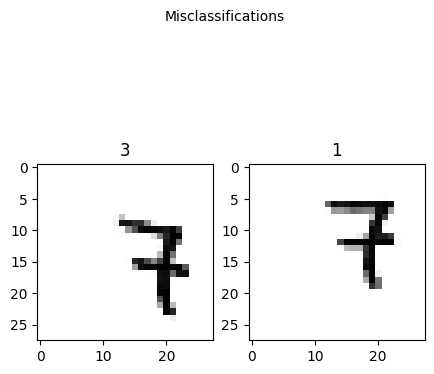

In [75]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=len(wrong_imgs), figsize=(5,5))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_imgs.items()):
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)

In [ ]:
# For 8 

In [39]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/8/*'
result, accuracy, gt, prediction = pred_using_h5_digit(model,path)

In [40]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

1.0
              precision    recall  f1-score   support

           8       1.00      1.00      1.00       510

    accuracy                           1.00       510
   macro avg       1.00      1.00      1.00       510
weighted avg       1.00      1.00      1.00       510



In [ ]:
# For 9

In [78]:
path = os.path.expanduser('~')+'/Handwritten_digits_test_MNIST+/9/*'
result, accuracy, gt, prediction, wrong_imgs = pred_using_h5_digit(model,path)

In [79]:
len(wrong_imgs)

98

In [ ]:
import operator
fig, axis = plt.subplots(nrows= 1, ncols=20, figsize=(10,10))
if type(axis)!=np.ndarray:
    axis = np.array([[axis]])
axis = axis.flatten()
count=0
for img_name, prediction in sorted(wrong_imgs.items(), key=operator.itemgetter(1))[:20]:
    pic =plt.imread(img_name)
    axis[count].imshow(pic)
    axis[count].set(title=prediction)
    count+=1
fig.suptitle('Misclassifications', fontsize=10)

In [77]:
print(accuracy)
from sklearn import metrics
print(metrics.classification_report(gt, prediction))

0.807843137254902
              precision    recall  f1-score   support

           4       0.00      0.00      0.00         0
           9       1.00      0.81      0.89       510

    accuracy                           0.81       510
   macro avg       0.50      0.40      0.45       510
weighted avg       1.00      0.81      0.89       510



/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/venkateshiyer/ocrtool/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1334: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
